In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import os


In [2]:
csvpath=os.path.join('output', 'best_picture_noms.csv')
best_movie=pd.read_csv(csvpath)

In [3]:

best_movie=best_movie.drop(columns='Unnamed: 0')

In [4]:
genre=best_movie['Genre'].value_counts()
genre_type=best_movie['Genre'].unique()

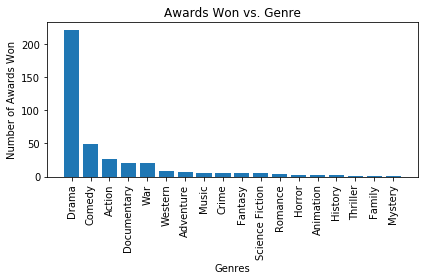

In [5]:

plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Awards Won")
plt.title("Awards Won vs. Genre")
plt.bar(genre_type, genre)
plt.tight_layout()
plt.savefig('Output/Award_by_Genre.png')

In [6]:
#Originally planned to also look at how the winning genre changed over time but given the overwhelming amount of drama
#there would not be any noticible patterns to see.

In [7]:
ordered_movies=best_movie.sort_values('Release Date')
ordered_movies=ordered_movies.reset_index(drop=True)

for i in range(len(ordered_movies['Budget'])):
    if ordered_movies['Budget'][i]==0:
        try:
            ordered_movies=ordered_movies.drop([i])
        except KeyError:
            print('fail')


In [8]:
ordered_movies=ordered_movies.reset_index(drop=True)



In [9]:
release_year=pd.read_csv('Output/best_picture_omdb_dataframe.csv')
year_data=release_year[['Title', 'Year']].dropna()
year_data=year_data.sort_values('Year')
year_data=year_data.reset_index(drop=True)
year_data

,Title,Year
0,The Love Parade,1929
1,Disraeli,1929
2,All Quiet on the Western Front,1930
3,The Big House,1930
4,The Divorcee,1930
...,...,...
535,Call Me by Your Name,2017
536,"Three Billboards Outside Ebbing, Missouri",2017
537,A Star Is Born,2018
538,Little Women,2019


In [10]:
drop=year_data.loc[year_data['Year']<'1950']
for i in range(len(year_data)):
    try:
        if year_data['Year'][i]==drop['Year'][i]:
            year_data=year_data.drop([i])
    except KeyError:
        break
year_data=year_data.reset_index(drop=True)
year_data

,Title,Year
0,Born Yesterday,1950
1,All About Eve,1950
2,Sunset Blvd.,1950
3,A Streetcar Named Desire,1951
4,Quo Vadis,1951
...,...,...
396,Call Me by Your Name,2017
397,"Three Billboards Outside Ebbing, Missouri",2017
398,A Star Is Born,2018
399,Little Women,2019


In [11]:
data_chart=pd.merge(year_data, ordered_movies, on='Title', how='inner')
graphing=data_chart.groupby(["Year"])
graphing["Budget"].mean()

Year
1950    1.400000e+06
1951    4.048968e+06
1952    2.365000e+06
1953    2.587500e+06
1954    1.455000e+06
            ...     
2014    2.038750e+07
2015    7.057143e+07
2016    2.387500e+07
2017    3.293750e+07
2018    3.600000e+07
Name: Budget, Length: 70, dtype: float64

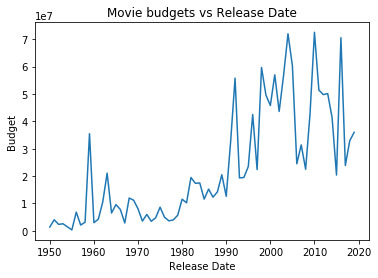

In [12]:
date=np.arange(1950, 2020)
budget=graphing['Budget'].mean()
plt.xlabel("Release Date")
#plt.xticks(data_chart['Year'])
#plt.xticks(rotation='vertical')
plt.ylabel("Budget")
plt.title("Movie budgets vs Release Date")
plt.plot(date, budget)
plt.savefig('Output/Movie_budget_over_time.png')

In [13]:
#chart scaled for e+07, but still indicates an overall increase in budget of award winning films over the years.

In [14]:
director=pd.read_csv('cleaned_director.csv')

In [15]:
director=director.drop(columns='Unnamed: 0')
director['Production 1']=director['Production 1'].dropna()

In [16]:
x_axis=director['Production 1'].dropna().unique()
y_axis=director['Production 1'].dropna().value_counts()

In [17]:
director=director[director['Year']>='1950']

director.reset_index(drop=True)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Awards,...,Production 2,Production 3,Production 4,Production 5,Production 6,Production 7,Director 1,Director 2,Director 3,Director 4
0,Frank Lloyd Wright,1998,TV-PG,23 Jan 1998,146 min,"Documentary, Biography, History","Ken Burns, Lynn Novick",Geoffrey C. Ward,"Edward Herrmann, Philip Bosco, Julie Harris, S...",Nominated for 1 Primetime Emmy. Another 3 wins...,...,NaN,NaN,NaN,NaN,NaN,NaN,Ken Burns,Lynn Novick,NaN,NaN
1,Frank Lloyd Wright,1998,TV-PG,23 Jan 1998,146 min,"Documentary, Biography, History","Ken Burns, Lynn Novick",Geoffrey C. Ward,"Edward Herrmann, Philip Bosco, Julie Harris, S...",Nominated for 1 Primetime Emmy. Another 3 wins...,...,NaN,NaN,NaN,NaN,NaN,NaN,Ken Burns,Lynn Novick,NaN,NaN
2,The Front Page,1974,PG,20 Dec 1974,105 min,"Comedy, Drama, Romance",Billy Wilder,"Ben Hecht (play), Charles MacArthur (play), Bi...","Jack Lemmon, Walter Matthau, Susan Sarandon, V...",Nominated for 3 Golden Globes. Another 2 wins ...,...,NaN,NaN,NaN,NaN,NaN,NaN,Billy Wilder,NaN,NaN,NaN
3,Skippy,1967–,NaN,03 Dec 1967,25 min,"Adventure, Family",NaN,"Lee Robinson, Dennis Hill","Ed Devereaux, Tony Bonner, Ken James, Garry Pa...",1 win.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Champ,1979,PG,04 Apr 1979,121 min,"Drama, Sport",Franco Zeffirelli,"Frances Marion (story), Walter Newman","Jon Voight, Faye Dunaway, Ricky Schroder, Jack...",Nominated for 1 Oscar. Another 2 wins & 6 nomi...,...,NaN,NaN,NaN,NaN,NaN,NaN,Franco Zeffirelli,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Dunkirk,2017,PG-13,21 Jul 2017,106 min,"Action, Drama, History, Thriller, War",Christopher Nolan,Christopher Nolan,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...",Won 3 Oscars. Another 64 wins & 230 nominations.,...,IMAX Corporation,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,NaN,NaN
342,Get Out,2017,R,24 Feb 2017,104 min,"Horror, Mystery, Thriller",Jordan Peele,Jordan Peele,"Daniel Kaluuya, Allison Williams, Catherine Ke...",Won 1 Oscar. Another 152 wins & 201 nominations.,...,QC Entertainment,Blumhouse Productions,NaN,NaN,NaN,NaN,Jordan Peele,NaN,NaN,NaN
343,Lady Bird,2017,R,01 Dec 2017,94 min,"Comedy, Drama",Greta Gerwig,Greta Gerwig,"Saoirse Ronan, Laurie Metcalf, Tracy Letts, Lu...",Nominated for 5 Oscars. Another 120 wins & 220...,...,A24,NaN,NaN,NaN,NaN,NaN,Greta Gerwig,NaN,NaN,NaN
344,Phantom Thread,2017,R,19 Jan 2018,130 min,"Drama, Romance",Paul Thomas Anderson,Paul Thomas Anderson,"Vicky Krieps, Daniel Day-Lewis, Lesley Manvill...",Won 1 Oscar. Another 57 wins & 121 nominations.,...,Ghoulardi Film Company,Perfect World Pictures,NaN,NaN,NaN,NaN,Paul Thomas Anderson,NaN,NaN,NaN


In [18]:
clean_dir=director[['Director', 'Year', 'Production 1']]
clean_dr=clean_dir.dropna()
clean_dr=clean_dr.reset_index(drop=True)

In [19]:
clean_dr['Production 1'].value_counts()
clean_dr['Production 1']=clean_dr['Production 1'].replace({"Warner Bros.": "Warner Brothers", "Warner Brothers/Seven Arts": "Warner Brothers", "Warner Bros. Pictures": "Warner Brothers", 
                                                          "20th Century Fox": "Twentieth Century Fox", "Columbia Pictures": "Columbia Pictures Corporation", 
                                                          "Paramount": "Paramount Pictures"})

x_axis=clean_dr['Production 1'].unique()
y_axis=clean_dr['Production 1'].value_counts()




In [20]:
y=y_axis.where(y_axis>5)

In [21]:
#x_axis
#df.drop
y=y.dropna()
y

Paramount Pictures               32.0
Twentieth Century Fox            20.0
Columbia Pictures Corporation    19.0
Warner Brothers                  19.0
Universal Pictures               15.0
Metro Goldwyn Mayer              10.0
United Artists                    9.0
Miramax Films                     7.0
Name: Production 1, dtype: float64

In [22]:
x_axis=["Paramount Pictures", "Twentieth Century Fox","Columbia Pictures Corporation","Warner Brothers", 
        "Universal Pictures", "Metro Goldwyn Mayer", "United Artists","Miramax Films"]
y_axis=[32, 20, 19, 19, 15, 10, 9, 7]

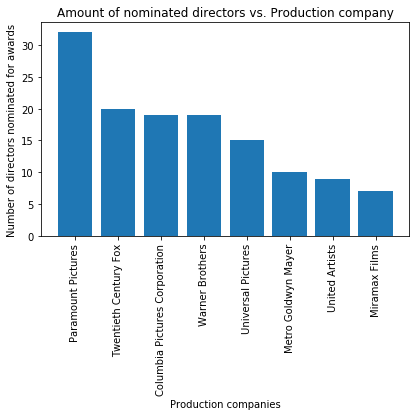

In [23]:
plt.xticks(rotation='vertical')
#y_axis=y_axis.drop(y_axis.value)
plt.xlabel("Production companies")
plt.ylabel("Number of directors nominated for awards")
plt.title("Amount of nominated directors vs. Production company")
plt.tight_layout()
plt.bar(x_axis, y)
plt.savefig('Output/Director.png')